# Multi Class Logistic Regression 

## Data Seti
Iris veri kümesi, istatistik ve makine öğrenimi uygulamalarında sıkça kullanılan bir veri setidir. Bu veri kümesi, İngiliz biyolog ve istatistikçi Ronald A. Fisher tarafından 1936'da tanıtılmıştır ve çoğunlukla sınıflandırma algoritmalarını eğitim ve test etmek için kullanılır.

Iris veri kümesinde üç farklı iris çiçeği türü bulunmaktadır:
Iris-setosa Iris-versicolour Iris-virginica Her bir çiçek türü için 50 örnek bulunmaktadır, toplamda 150 örnekten oluşur.

Her bir örnek için dört özellik (feature) kaydedilmiştir:
Taç yaprağının uzunluğu (sepal length) Taç yaprağının genişliği (sepal width) 

Çiçek yaprağının uzunluğu (petal length) Çiçek yaprağının genişliği (petal width) Bu özellikler santimetre (cm) cinsinden ölçülmüştür.

Amaç, bu dört özellik yardımıyla çiçeklerin hangi türe ait olduğunu tahmin eden bir model oluşturmaktır. Yani, iris veri kümesi, denetimli öğrenme (supervised learning) problemi için bir veri kümesi olarak kullanılır.

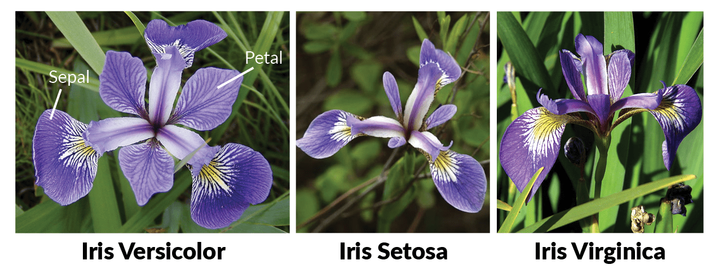

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [49]:
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa
4         5.000        3.600         1.400        0.200  setosa

In [4]:
# skitlearn sadece numeric datalar uzerinde islem yapar. Target'te ne varsa calisir. Bu skilearn'in gucunden geliyor kelimelerle de calisabilmesi.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [52]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
# Balanced bir data. Her turden esit sayida var. 

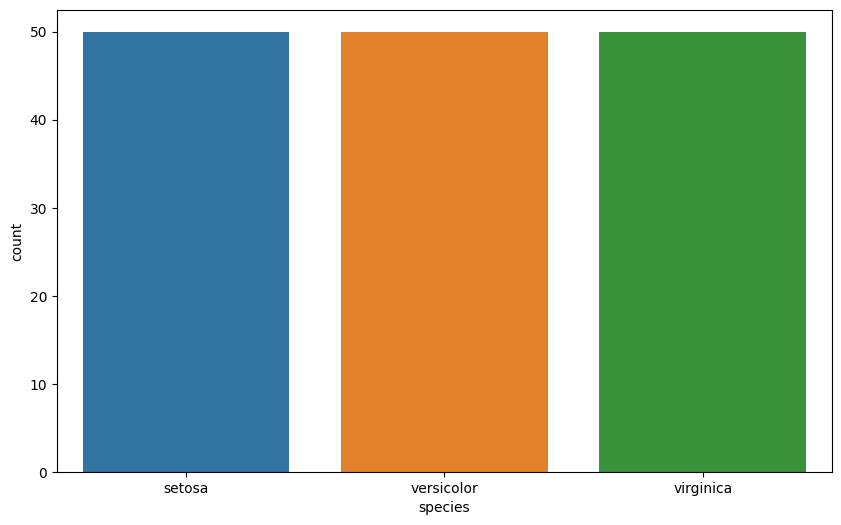

In [54]:
sns.countplot(df["species"]);

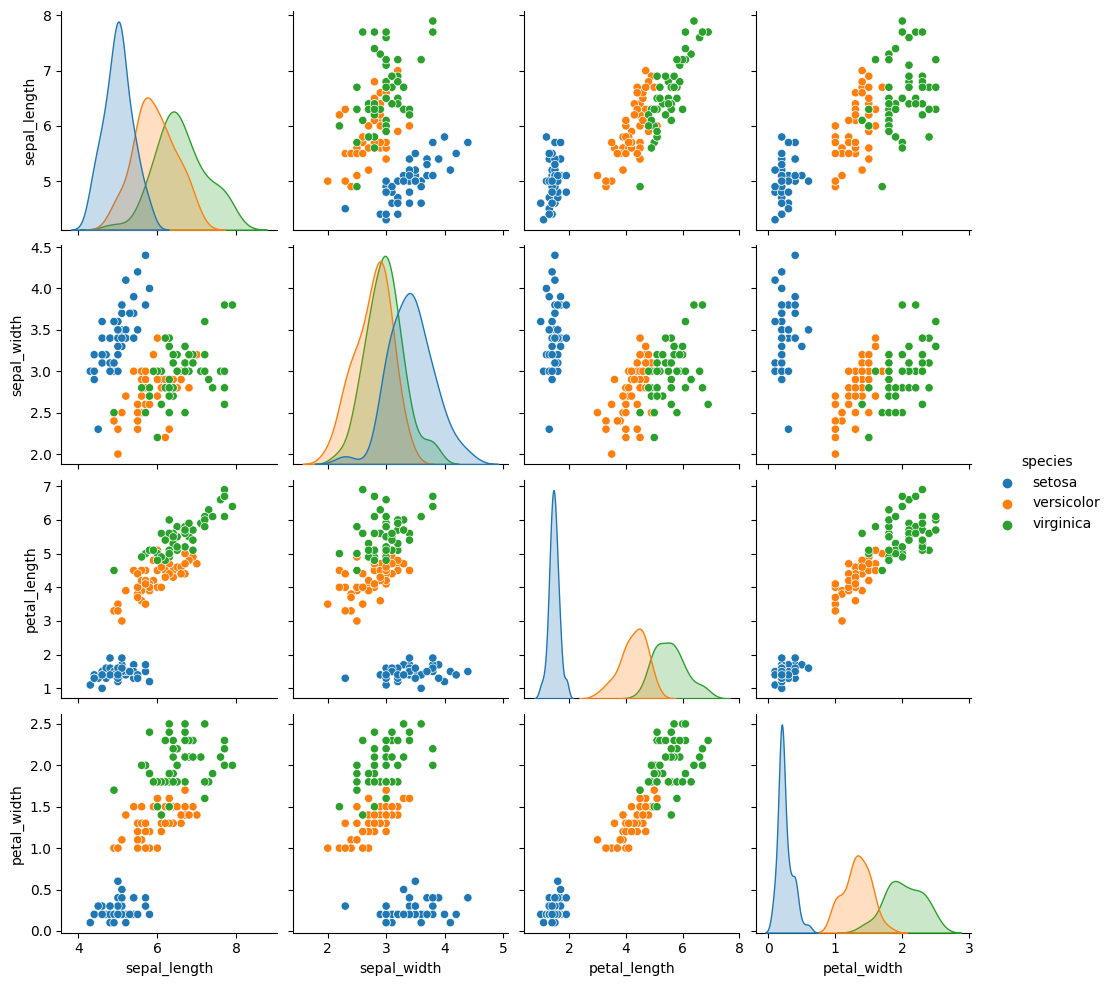

In [11]:
sns.pairplot(df, hue = "species"); #classification modellerinde hue ye target verilir

In [12]:
# Setosa digerlerinden ayrilmis. Verscolor ve Virginica kariskik, model bunlari ayirmakta zorlanacaktir. 

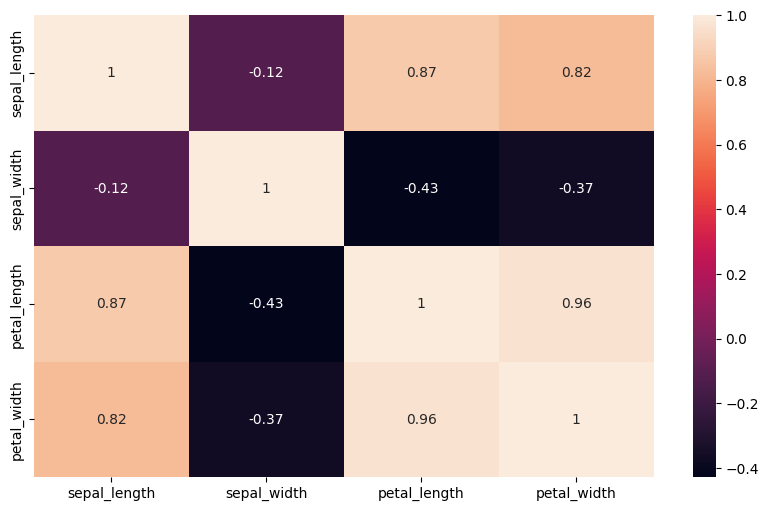

In [13]:
sns.heatmap(df.corr(), annot = True);

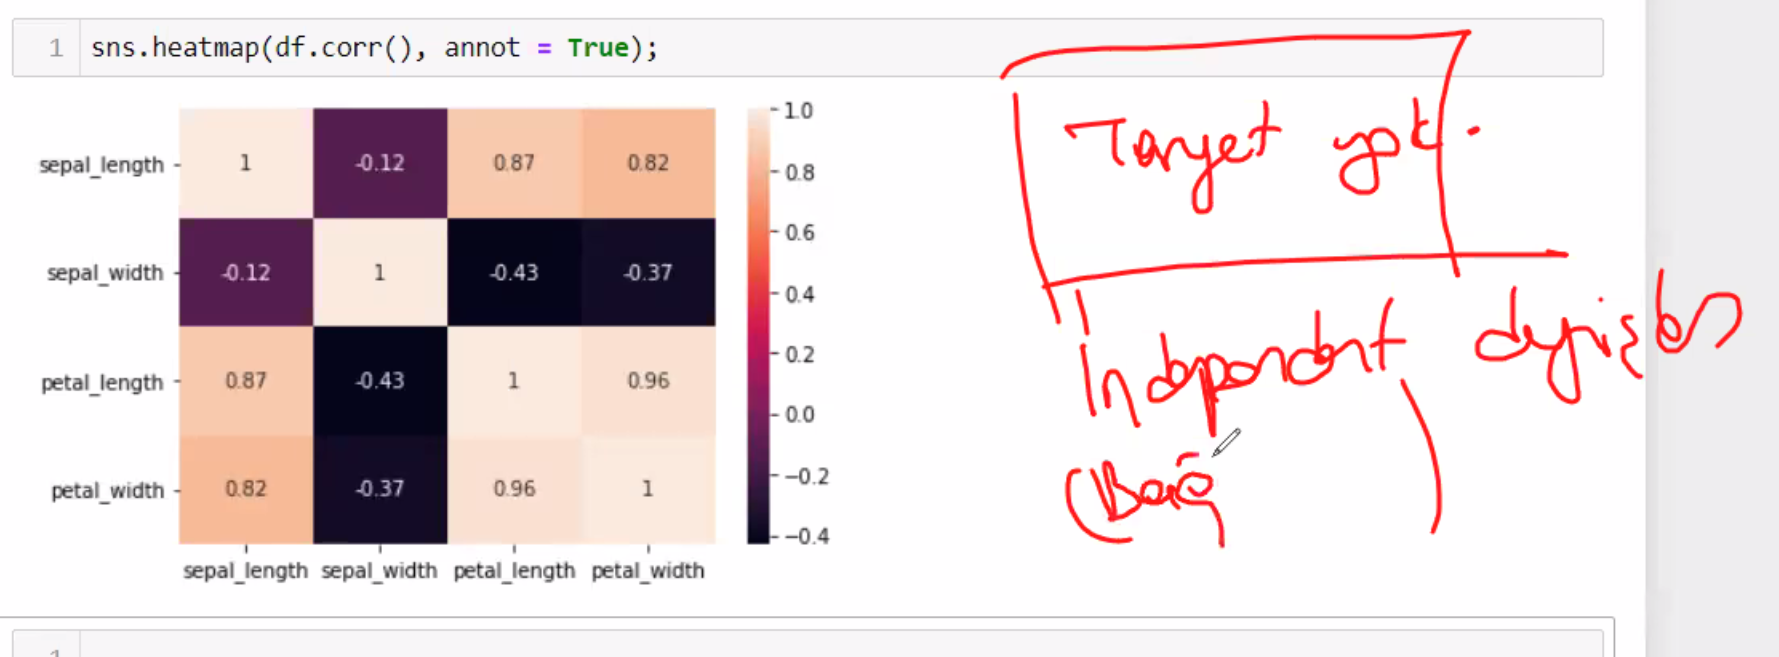

In [14]:
# petal_with ile petal_length arasinda korelasyon cok yukse (0.96) bunlarin bir arada kullanilmasi CDBS na neden olabilir. 
# CDB varsa bile bu verileri birlikte kullaniriz. Regulazyo yontemlerini kullaniriz.

# 2'sini bir arada ve tek tek kullanarak calisir, skorlara bakarim. 
# Hangi modelde skor yuksekse onu rapor et.  (Deneme-yanilma; best practice)




In [15]:
from mpl_toolkits.mplot3d import Axes3D

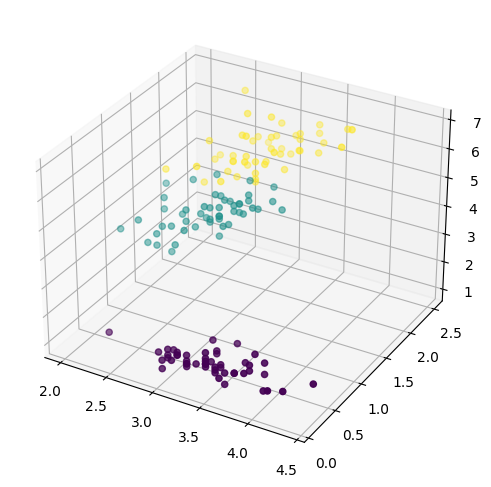

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

In [17]:
import plotly.express as px
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

# Labelleme

In [55]:
X = df.drop("species", axis = 1)
y=df["species"]

# Train-Test Split and Scaling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [58]:
# Scalling;

scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling and Model Performance

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [24]:
# Bugune ozel; default parametrelerle ilerleyecegiz

## Modelling width Default Parameters

In [61]:
log_model = LogisticRegression()

In [62]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [63]:
# Olsilik katsayilarini alalim (Modelin ROC ve AUC ile genel performansini degerlendirebilmek icin proba'lara ihtiyacimiz var. )

y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

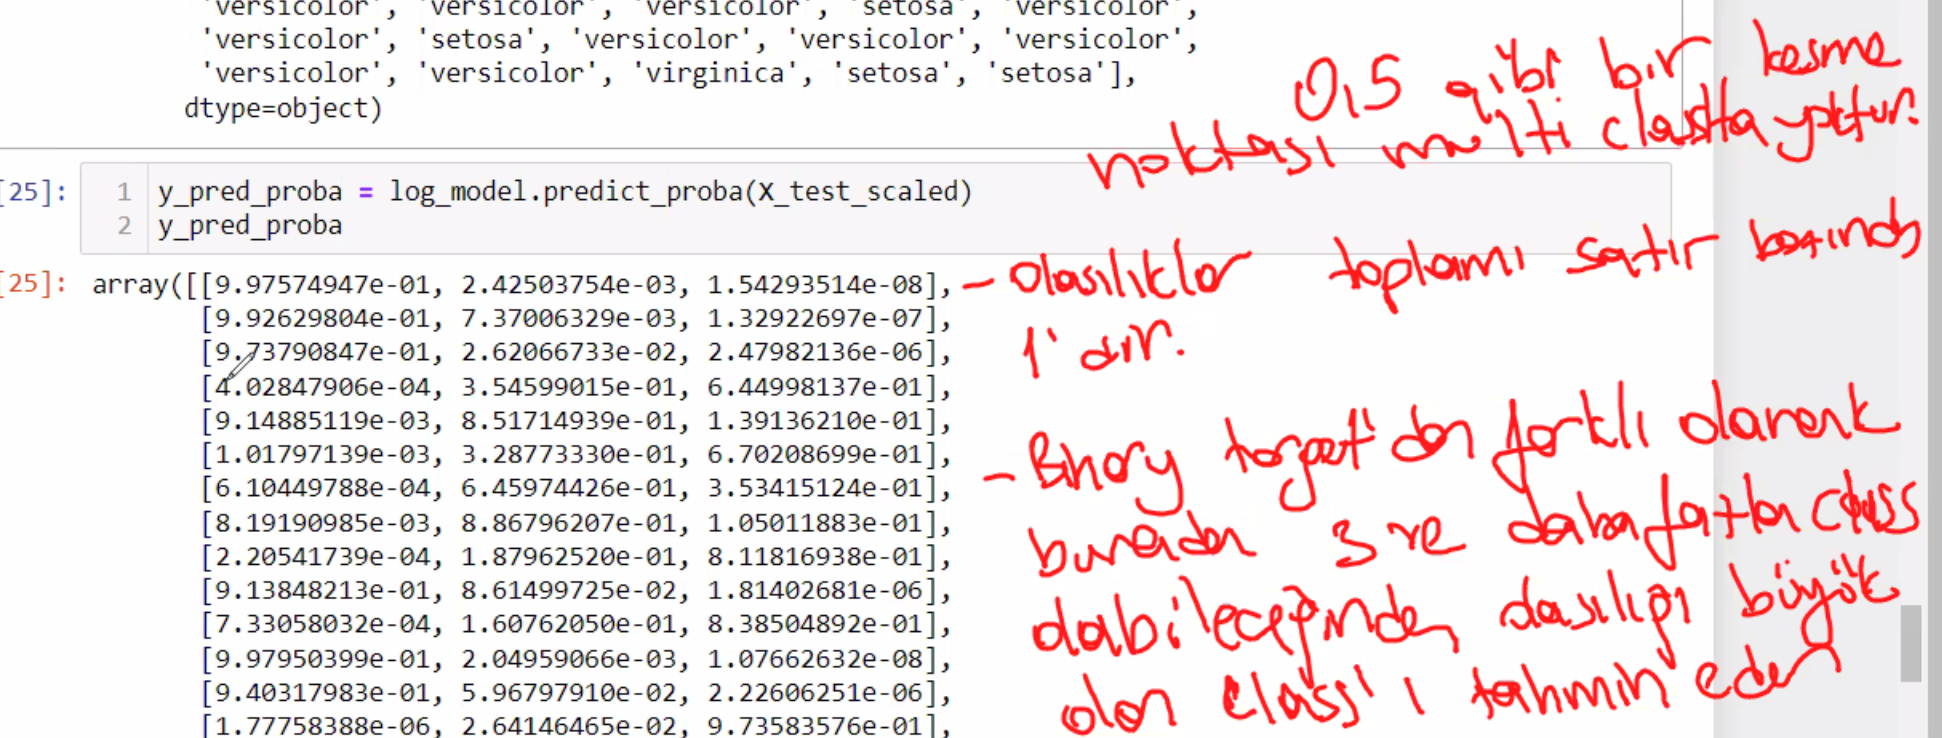

In [28]:
# Binary'de default thereshold 0.5 idi burada boyle degil en buyuk olasilik hangisindeyse o kategoriye atiyor

In [64]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

sepal_length  sepal_width  petal_length  petal_width     species
33          5.500        4.200         1.400        0.200      setosa
16          5.400        3.900         1.300        0.400      setosa
43          5.000        3.500         1.600        0.600      setosa
129         7.200        3.000         5.800        1.600   virginica
50          7.000        3.200         4.700        1.400  versicolor
123         6.300        2.700         4.900        1.800   virginica
68          6.200        2.200         4.500        1.500  versicolor
53          5.500        2.300         4.000        1.300  versicolor
146         6.300        2.500         5.000        1.900   virginica
1           4.900        3.000         1.400        0.200      setosa
147         6.500        3.000         5.200        2.000   virginica
32          5.200        4.100         1.500        0.100      setosa
31          5.400        3.400         1.500        0.400      setosa
122         7.700        2.800         6.700        2.000   virginica
127         6.100        3.000         4.900        1.800   virginica
74          6.400        2.900         4.300        1.300  versicolor
88          5.600        3.000         4.100        1.300  versicolor
96          5.700        2.900         4.200        1.300  versicolor
42          4.400        3.200         1.300        0.200      setosa
134         6.100        2.600         5.600        1.400   virginica
80          5.500        2.400         3.800        1.100  versicolor
48          5.300        3.700         1.500        0.200      setosa
90          5.500        2.600         4.400        1.200  versicolor
65          6.700        3.100         4.400        1.400  versicolor
97          6.200        2.900         4.300        1.300  versicolor
64          5.600        2.900         3.600        1.300  versicolor
93          5.000        2.300         3.300        1.000  versicolor
114         5.800        2.800         5.100        2.400   virginica
25          5.000        3.000         1.600        0.200      setosa
41          4.500        2.300         1.300        0.300      setosa

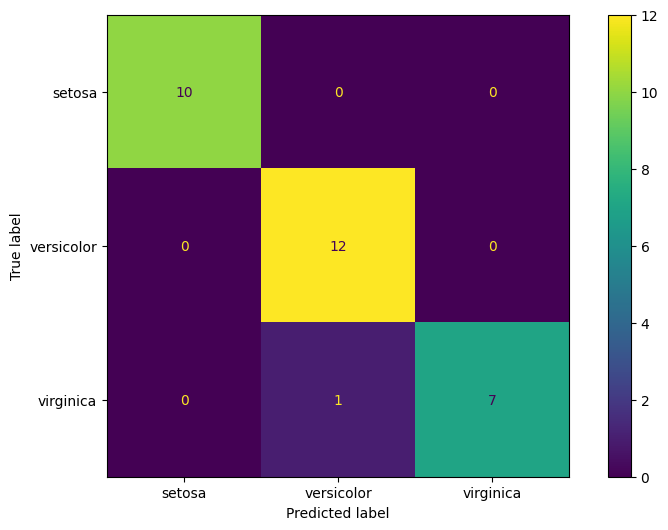

In [65]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

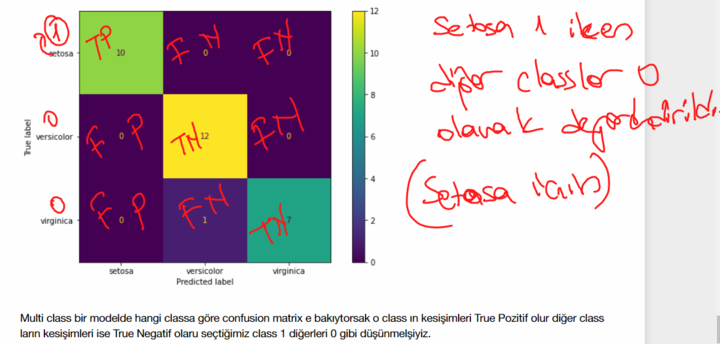

versicloloru 1 yaparsak 
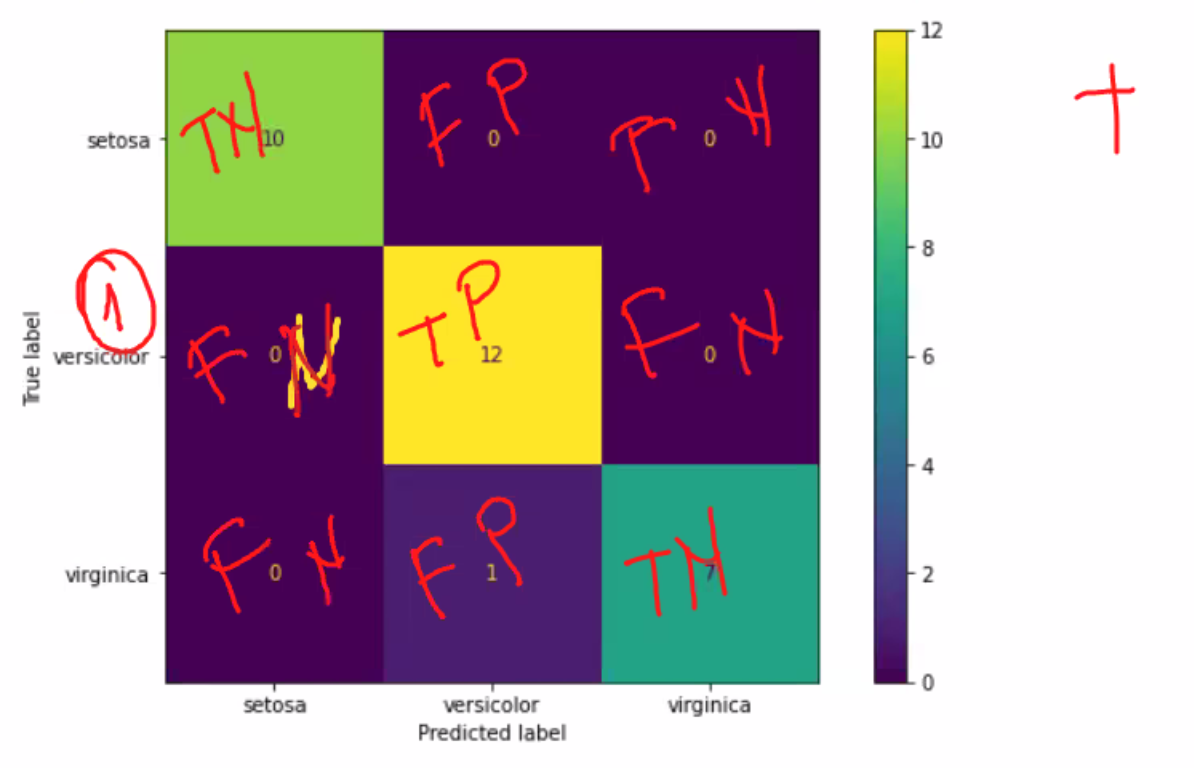

virginica yi 1 yaparsak

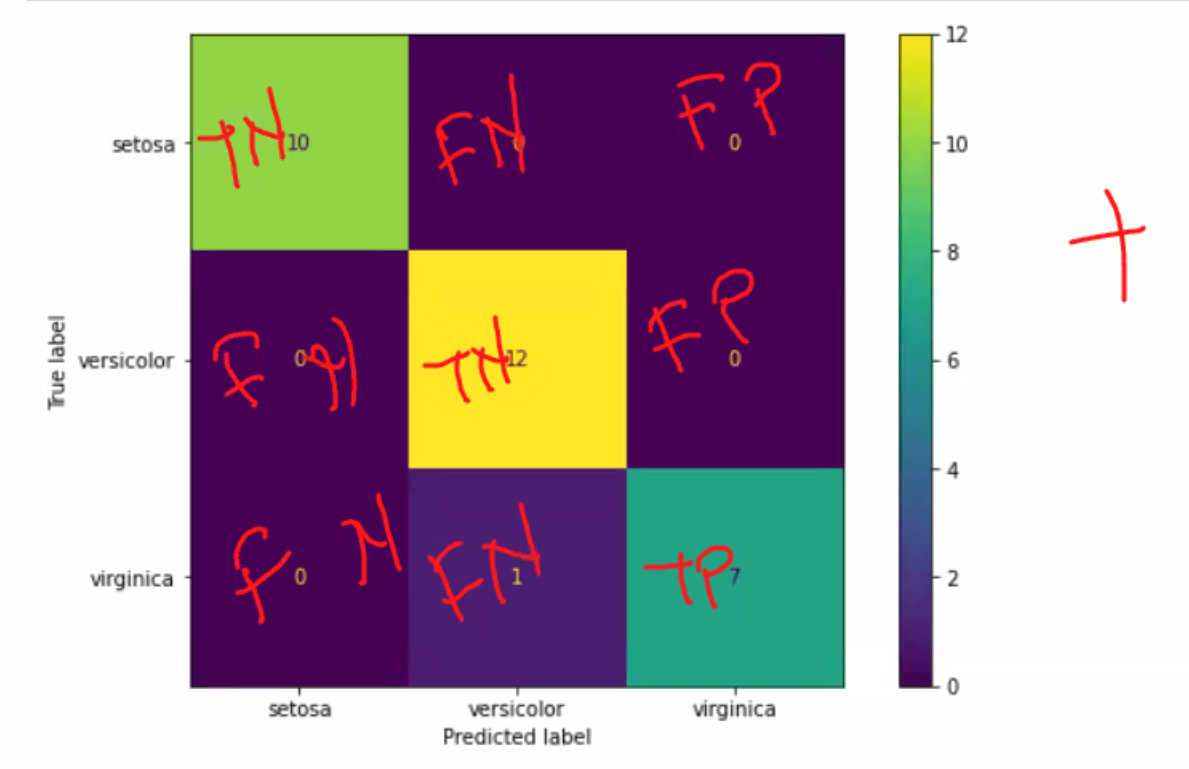

##  eval_metrics

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("************************************")
   
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

************************************
Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



* Data dengeli mi? Evet, Accuracy, F1'e bakmak iyi. 
Dengesiz olsaydi macro_avg ye bakilabilirdi. 

* Agirlikli bir sinif var mi?  
weighted_avg --> belli siniflara daha fazla agirlik vermek istiyorsak bunu kullanabiliriz.

Hepsi (tum classlar) onemli ise accuracy

Tum siniflari esit agirlikli degerlendirmek icin macro_avg

Eğer "benim için hepsi önemli" diyorsanız ve veri setiniz dengeliyse doğruluk kullanabilirsiniz. Ancak, veri setiniz dengesizse ve tüm sınıfların performansını eşit olarak değerlendirmek istiyorsanız macro-average ölçümlere bakmanız daha uygun olacaktır.

**Dengesiz Veri Setleri:** Eğer bir sınıflandırma problemi üzerinde çalışıyorsanız ve veri setiniz dengesizse (örneğin, bir sınıfta çok fazla örnek ve diğerlerinde çok az örnek varsa) sadece doğruluk (accuracy) kullanarak modelin performansını ölçmek yanıltıcı olabilir. Özellikle, modeliniz çoğunluk sınıfına önyargılı olabilir ve yine de yüksek doğruluk elde edebilir.

**Macro Average:** **Dengesiz** veri setlerinde, her sınıfın performansını eşit olarak değerlendirmek için macro-average F1 skoru, precision veya recall gibi ölçümler kullanılabilir. Bu ölçümler, tüm sınıfların performansını eşit ağırlıkta dikkate alır.

**Doğruluk (Accuracy):** Eğer veri setiniz **dengeliyse**, yani tüm sınıflarda benzer sayıda örnek varsa, doğruluk modelinizin genel performansını ölçmek için kullanılabilir.

**Weighted Average:** Eğer bazı sınıfların performansını diğerlerinden daha önemli buluyorsanız, bu sınıflara daha fazla ağırlık verilerek hesaplanan weighted-average F1 skoru, precision veya recall kullanılabilir.

Eğer "benim için hepsi önemli" diyorsanız ve veri setiniz dengeliyse doğruluk kullanabilirsiniz. Ancak, veri setiniz dengesizse ve tüm sınıfların performansını eşit olarak değerlendirmek istiyorsanız macro-average ölçümlere bakmanız daha uygun olacaktır.

## CV

Bu skorlar gercekten tum data setinde gecerli mi? 
Bunu anlayabilmek icin CV yapalim.

Burada 1 class'a gore CV yapabiliyoruz

In [68]:
# Burada 1 classa gore CV yapabiliyoruz (Normalinde buna gerek yok, istisna olarak yaptik);

from sklearn.model_selection import cross_validate
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

In [69]:
# Var olan metrikler

import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

## Sectigimiz 1 class'a (versicolor) yonelik CV yapacagiz

In [70]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [72]:
# manuel yaparken her CV de modeli sifirlamamiz gerekiyor. Mnulei her zaman kullanmayacagiz. Nir gun bir yerde ihtiyac duyarsak diye goruyoruz. 

# Alttaki koddda "model = LogisticRegression" yazan yer modelin sifirlandigini gostermekte.

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor,
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]



test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

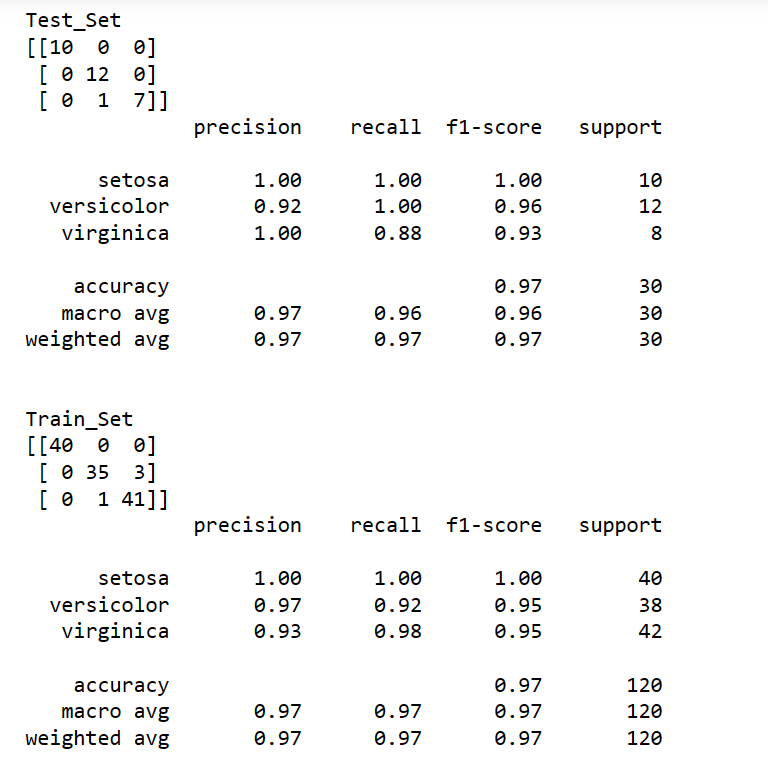

Sonuclar uyumlu OVERFIT yok

## Proba

In [74]:
# Tahmin yaparken hepsini bir arada gorebilmek icin;

y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)


sepal_length  sepal_width  petal_length  petal_width     species  \
93          5.000        2.300         3.300        1.000  versicolor   
31          5.400        3.400         1.500        0.400      setosa   
97          6.200        2.900         4.300        1.300  versicolor   
43          5.000        3.500         1.600        0.600      setosa   
16          5.400        3.900         1.300        0.400      setosa   
123         6.300        2.700         4.900        1.800   virginica   
74          6.400        2.900         4.300        1.300  versicolor   
48          5.300        3.700         1.500        0.200      setosa   
88          5.600        3.000         4.100        1.300  versicolor   
134         6.100        2.600         5.600        1.400   virginica   

           pred  pred_proba_setosa  pred_proba_versicolar  \
93   versicolor              0.051                  0.936   
31       setosa              0.940                  0.060   
97   versicolor              0.019                  0.898   
43       setosa              0.974                  0.026   
16       setosa              0.993                  0.007   
123   virginica              0.001                  0.329   
74   versicolor              0.014                  0.905   
48       setosa              0.987                  0.013   
88   versicolor              0.096                  0.846   
134  versicolor              0.001                  0.512   

     pred_proba_virginica  
93                  0.013  
31                  0.000  
97                  0.082  
43                  0.000  
16                  0.000  
123                 0.670  
74                  0.081  
48                  0.000  
88                  0.058  
134                 0.487

In [38]:
# Buyuk olan olasiligin oldugu ture atama (siniflama) yapar. 

In [75]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species  \
64          5.600        2.900         3.600        1.300  versicolor   
53          5.500        2.300         4.000        1.300  versicolor   
80          5.500        2.400         3.800        1.100  versicolor   
32          5.200        4.100         1.500        0.100      setosa   
88          5.600        3.000         4.100        1.300  versicolor   
146         6.300        2.500         5.000        1.900   virginica   
50          7.000        3.200         4.700        1.400  versicolor   
33          5.500        4.200         1.400        0.200      setosa   
97          6.200        2.900         4.300        1.300  versicolor   
43          5.000        3.500         1.600        0.600      setosa   

           pred  pred_proba_setosa  pred_proba_versicolar  \
64   versicolor              0.100                  0.866   
53   versicolor              0.008                  0.887   
80   versicolor              0.019                  0.948   
32       setosa              0.998                  0.002   
88   versicolor              0.096                  0.846   
146   virginica              0.000                  0.188   
50   versicolor              0.009                  0.852   
33       setosa              0.998                  0.002   
97   versicolor              0.019                  0.898   
43       setosa              0.974                  0.026   

     pred_proba_virginica  
64                  0.035  
53                  0.105  
80                  0.033  
32                  0.000  
88                  0.058  
146                 0.812  
50                  0.139  
33                  0.000  
97                  0.082  
43                  0.000

In [40]:
# y_prd_proba lari kullanarak ROC -AUC skorlarina ulascagiz

#  Best Parameters With Grid Search CV



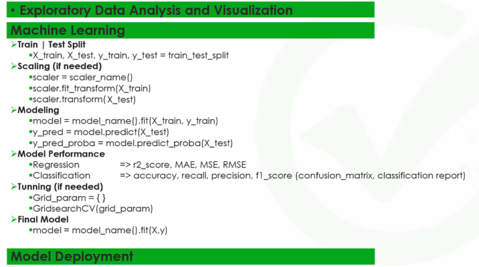


penalty **"l1, l2"**, elasticnet, none ve ... ile kullanilir.

**C=** regularizasyon kuvvetinin tersi kuvveti ile işlem yapıyor. değer büyüdükçe regularizasyon kuvvetim azalıyor küçüldükçe artıyor. Alphanın tersi

**class weight var =** labellardaki dengesizliği nispeten gidermiş oluyor balanced dersek

**solver =** modelimizdeki optimizasyon işlemleri yapan parametreler solver içinde oluyor.
solver default lbfgs küçük data setleri için liblinear multiclass için newton-cg, sag, saga ve lbfgs seçilebilir




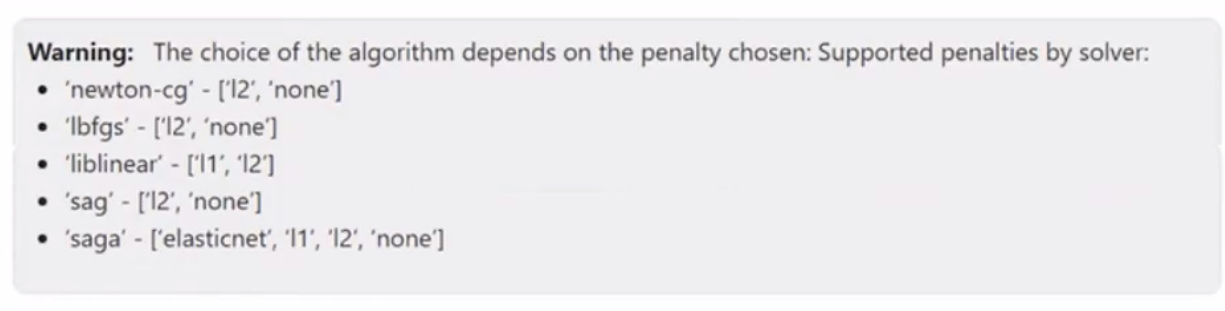

*  Kucuk data setleeri icin "lbfgs"

* Multiclass icin "sag, saga, lbfgs" kullanilabilir. 

In [76]:
# Hyper parameters (Modeli sifirladik);

log_model = LogisticRegression(max_iter=100000, random_state = 42)


In [84]:
""" Originl Kod bu ama calismdigi icin asagidakilerden yararlandim;
# Yeni hyper parametreler; "C ve penalty"

penalty = ["l1", "l2"] # Lasso - Ridge burada kullaniliyor. Defaultu L2. 
C = np.logspace(-1, 5, 20) # C degeri buyudukce regularizasyon siddeti azaliyor (featurenin agirligini artiriyor), alphanin tersi seklinde calisiyor. C nin defaultu 1.

param_grid = {"penalty" : penalty,
             "C" : C} 
#dengeiz data setlerinde "balance" parametresi ile kismen duzetebiliriz. """

In [43]:
"""#Adem Beyin cozumu;

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {
    "solver": ['liblinear', 'saga'],
    "penalty": ['l1']
} """

'#Aden Beyin cozumu;\n\npenalty = ["l1", "l2"]\nC = np.logspace(-1, 5, 20)\n\nparam_grid = {\n    "solver": [\'liblinear\', \'saga\'],\n    "penalty": [\'l1\']\n} '

In [87]:
# Ahmet Can beyin cozumu;
penalty = ["l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}  

In [88]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [89]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l2']})

In [90]:
grid_model.best_params_

{'C': 7.847599703514611, 'penalty': 'l2'}

In [91]:
grid_model.best_score_  # ortalama accuracy degerini getirir

0.9666666666666666

In [92]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

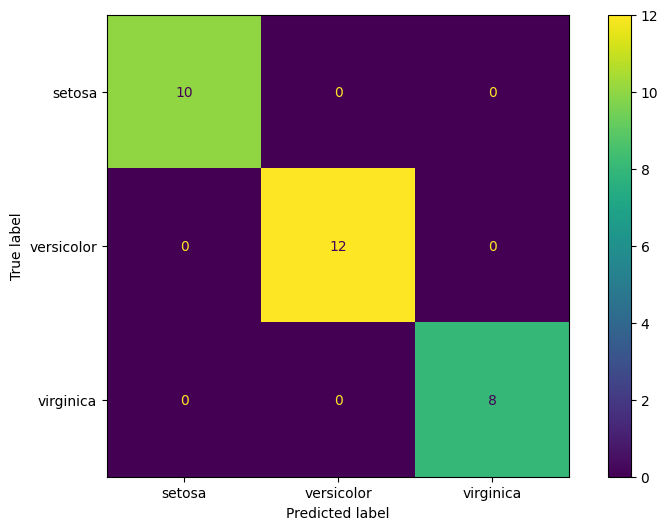

In [93]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [ ]:
# Model cok iyi tahmin yapti.

In [94]:
# Eval metrics

eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

************************************
Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# ROC (Receiver Operating Curve) and AUC (Area Under Curve)





In [95]:
from sklearn.metrics import plot_roc_curve

In [97]:
plot_roc_curve(grid_model, X_test_scaled, y_test); # BU KOD CALISMAYACAK, TAKILMA!!!
# hata verir target 2 den fazla sinif icerdigi icin. Bunun yerine yellowbrics kutuphanesini kullaniriz. 

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

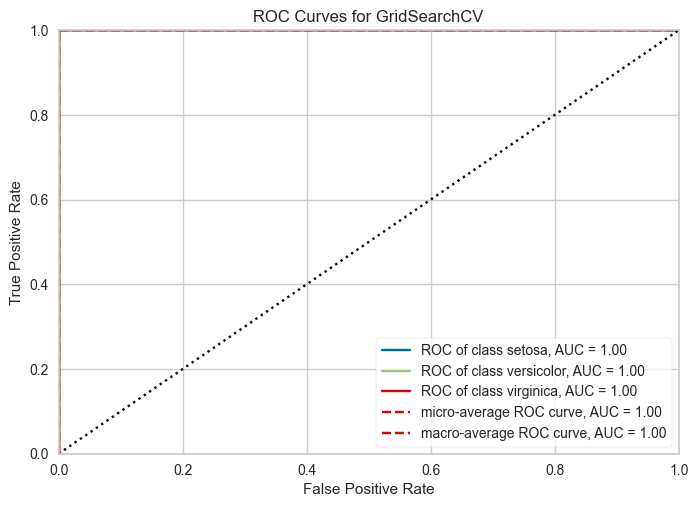

In [98]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

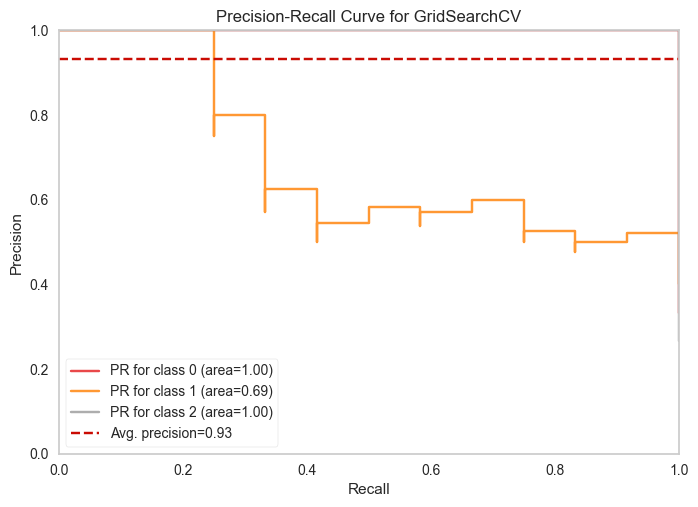

In [99]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model
viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

* Dengeli data setlerinde (binary olmayanlarda) ROC-AUC skoruna, 
* dengesiz data setlerinde Precission - Recall Curve skorlarina ve gorsellerine bakacagiz. 

* Bizim datamiz dengeli oldugu icin ROC - AUC yi kullairiz. Bu modelin tahmin basarisi %100. 

# FINAL MODEL & DEPLOYMENT

Final model tum data kullanilarak yapilir. 

In [100]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [101]:
# Modeli kaydetmek istiyoruz;

import pickle
pickle.dump(scaler, open("scaler_iris", 'wb')) #scale modelimi kayıt ediyorum

In [102]:
X_scaled = scaler.transform(X) #sonra transform yapıyorum

In [103]:
final_model = LogisticRegression().fit(X_scaled, y)#final modelimi oluşturuyorum (fit ediyorum).

In [104]:
pickle.dump(final_model, open("final_model_iris", 'wb'))#onu da (final modeli de) kayıt ediyorum

In [105]:
X.describe().T#describe bakıyorum ki buradaki skorlara yakın skorlar verip tahmin yapacağım

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [107]:
# Yukarudaki tablodaki degerlere benzer sekilde kendimiz yeni degerler giriyoruz (Nodeli yeni veriler uzerinde siuniyoruz);

my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [108]:
#df e cevirelim yeni gelen datayi

sample = pd.DataFrame(my_dict)
sample


sepal_length  sepal_width  petal_length  petal_width
0         4.500        2.200         1.300        0.200
1         5.800        3.000         4.300        1.300
2         7.500        4.200         6.500        2.300

In [110]:
final_model.predict(sample) #predict sonuclari. Ama scale yapmadan calistigimiz icin hatali olabilir. 

array(['versicolor', 'virginica', 'virginica'], dtype=object)

In [111]:
# Scaling islemine ait dosyayi (sacaler i) geri cagiralim;

scaler_sample = pickle.load(open("scaler_iris", "rb"))

In [112]:
sample_scaler = scaler_sample.transform(sample)

In [113]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [114]:
prediction = final_model.predict(sample_scaler)
prediction_proba = final_model.predict_proba(sample_scaler)

In [115]:
sample["pred"] = prediction
sample["pred_proba_setosa"] = prediction_proba[:,0]
sample["pred_proba_versicolor"] = prediction_proba[:,1]
sample["pred_proba_virginica"] = prediction_proba[:,2]
sample

sepal_length  sepal_width  petal_length  petal_width        pred  \
0         4.500        2.200         1.300        0.200      setosa   
1         5.800        3.000         4.300        1.300  versicolor   
2         7.500        4.200         6.500        2.300   virginica   

   pred_proba_setosa  pred_proba_versicolor  pred_proba_virginica  
0              0.712                  0.288                 0.000  
1              0.044                  0.890                 0.066  
2              0.000                  0.021                 0.979

## Final Model with Grid Search

Grid Search de elde ettigimiz hyper parametrelerle Final Modeli tahmin edecegiz.

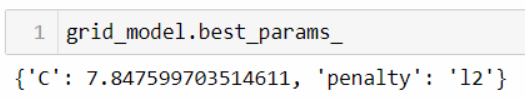

In [116]:
final_model_new = LogisticRegression(C=7.85, penalty='l2').fit(X_scaled, y)

In [117]:
prediction2 = final_model_new.predict(sample_scaler)
prediction_proba2 = final_model_new.predict_proba(sample_scaler)

In [118]:
sample["pred2"] = prediction2
sample["pred_proba_setosa2"] = prediction_proba2[:,0]
sample["pred_proba_versicolor2"] = prediction_proba2[:,1]
sample["pred_proba_virginica2"] = prediction_proba2[:,2]
sample

sepal_length  sepal_width  petal_length  petal_width        pred  \
0         4.500        2.200         1.300        0.200      setosa   
1         5.800        3.000         4.300        1.300  versicolor   
2         7.500        4.200         6.500        2.300   virginica   

   pred_proba_setosa  pred_proba_versicolor  pred_proba_virginica       pred2  \
0              0.712                  0.288                 0.000      setosa   
1              0.044                  0.890                 0.066  versicolor   
2              0.000                  0.021                 0.979   virginica   

   pred_proba_setosa2  pred_proba_versicolor2  pred_proba_virginica2  
0               0.865                   0.135                  0.000  
1               0.008                   0.984                  0.008  
2               0.000                   0.003                  0.997

Scaling yapmadan tahmin aldigimizda; 
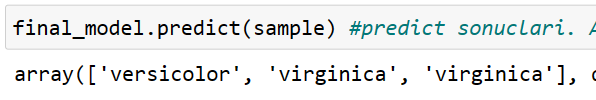

cikmisti oysa simdi gercek (dogru) sonuclar; **setosa, versicolor, virginica** seklinde. 

Demek ki scaling yapmadan devam etmemek gerekiyormus.